In [107]:
# - KÜTÜPHANELER

# Gerekli ek kütüphaneler (XGBoost, interaktif grafikler vb.)

!pip install -q xgboost plotly kaleido

# Veri okuma ve işleme
import pandas as pd
import numpy as np


# Görselleştirme
import matplotlib.pyplot as plt
import seaborn as sns

# Ön işleme ve modelleme için sklearn

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Kullanılacak makine öğrenmesi modelleri
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb

# Harita ve interaktif grafikler
import plotly.express as px
# Grafik stili
plt.style.use("seaborn-v0_8")

In [108]:
# – VERİ YÜKLEME

# Google Colab üzerinden dosya yükleme
from google.colab import files
uploaded = files.upload()

# Yüklenen dosyanın adını al

csv_name = list(uploaded.keys())[0]

# CSV dosyasını dataframe olarak oku
df = pd.read_csv(csv_name)

# İlk 5 satırı kontrol et
print("Veri yüklendi:",csv_name )
df.head()


Saving global-data-on-sustainable-energy (1).csv to global-data-on-sustainable-energy (1) (4).csv
Veri yüklendi: global-data-on-sustainable-energy (1) (4).csv


,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


In [109]:

# sütun isimlerini temizleme
df.columns = df.columns.str.replace('\n', ' ').str.strip()
# genel bilgi
print("Boyut: ", df.shape)
print(df.info())

Boyut:  (3649, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity fr

In [110]:

# eksik değerleri kontrol etme
print("\nEksik değerler(temizleme öncesi): ")
print(df.isnull().sum().sort_values(ascending=False).head(10))



Eksik değerler(temizleme öncesi): 
Renewables (% equivalent primary energy)                            2137
Financial flows to developing countries (US $)                      2089
Renewable-electricity-generating-capacity-per-capita                 931
Value_co2_emissions_kt_by_country                                    428
gdp_growth                                                           317
gdp_per_capita                                                       282
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          207
Renewable energy share in the total final energy consumption (%)     194
Access to clean fuels for cooking                                    169
Electricity from nuclear (TWh)                                       126
dtype: int64


In [111]:
# sayısal sütunları medyan ile doldurma işlemi
numeric_cols = df.select_dtypes(include="number").columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

In [112]:
# çok eksik sütunları silme işlemi(%30 dan fazlası boş olanlar)
df=df.dropna(axis=1, thresh=len(df)*0.7)

In [113]:
# sayısal sütunlarda eksikleri medyanla doldurma işlemi
numeric_cols = df.select_dtypes(include="number").columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

In [114]:
# tekrar eden satırları silme işlemi
df= df.drop_duplicates()

In [115]:

# temiz veriyi kaydetme
df.to_csv("clean_energy_data_cleaned.csv", index=False)
print("\n veri temizleme tamamlandi!")




 veri temizleme tamamlandi!


In [116]:
# eksik veri kaldı mı?
print("\nTemizlik sonrasi eksik değerler:")
print(df.isnull().sum().sort_values(ascending=False).head(10))


Temizlik sonrasi eksik değerler:
Density\n(P/Km2)                                                    1
Year                                                                0
Access to electricity (% of population)                             0
Access to clean fuels for cooking                                   0
Entity                                                              0
Renewable-electricity-generating-capacity-per-capita                0
Financial flows to developing countries (US $)                      0
Electricity from fossil fuels (TWh)                                 0
Renewable energy share in the total final energy consumption (%)    0
Electricity from renewables (TWh)                                   0
dtype: int64


In [117]:

#min max medyan dağılımı gösterir
print(df["Access to electricity (% of population)"].describe())




count    3649.000000
mean       78.986944
std        30.251076
min         1.252269
25%        59.952995
50%        98.361570
75%       100.000000
max       100.000000
Name: Access to electricity (% of population), dtype: float64


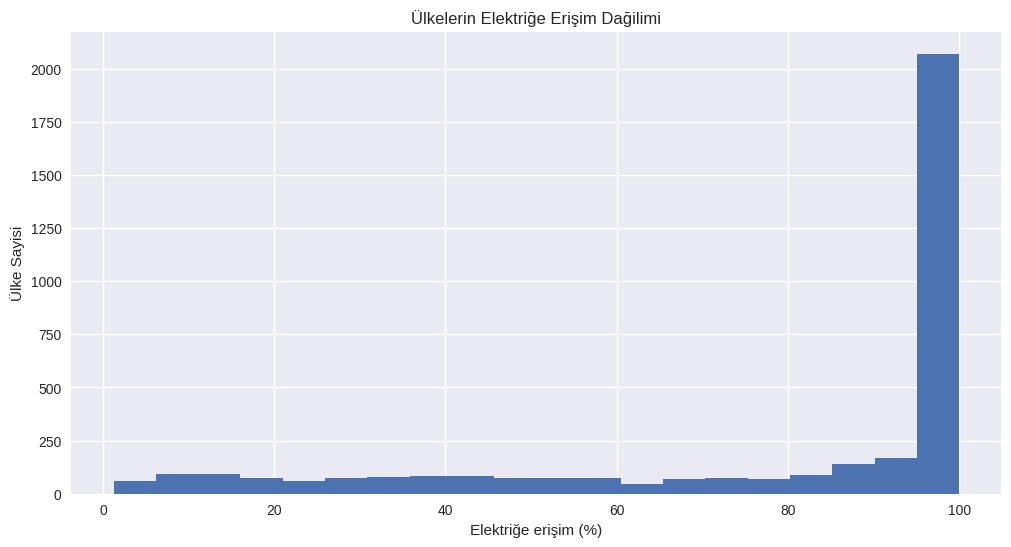

In [118]:
#histogram çizim(düşük erişimli ülkeler var mı? sınıflandırma mantıklı mı?)
plt.figure(figsize=(12,6))
plt.hist(df["Access to electricity (% of population)"], bins=20) #x eksenini 20 eşit parçaya böl.
plt.xlabel("Elektriğe erişim (%)")
plt.ylabel("Ülke Sayisi")
plt.title("Ülkelerin Elektriğe Erişim Dağilimi")
plt.show()


In [119]:
# Elektriğe erişime göre sınıflandırma
def energy_level(x):
    if x < 50:
        return "Düşük"
    elif x < 90:
        return "Orta"
    else:
        return "Yüksek"
df["Energy_Access_Level"] = df["Access to electricity (% of population)"].apply(energy_level)

In [120]:
# Risk skoru hesaplama
df["Risk_Score"]=((100-df["Access to electricity (% of population)"])*0.4 + df["Electricity from fossil fuels (TWh)"]*0.3 - df["Renewable energy share in the total final energy consumption (%)"]*0.3)
# birkaç satır yazdırarak risk skoru doğru mu üretildi kontrol ettim.
print(df[["Access to electricity (% of population)","Electricity from fossil fuels (TWh)","Renewable energy share in the total final energy consumption (%)","Risk_Score"]].head())


   Access to electricity (% of population)  \
0                                 1.613591   
1                                 4.074574   
2                                 9.409158   
3                                14.738506   
4                                20.064968   

   Electricity from fossil fuels (TWh)  \
0                                 0.16   
1                                 0.09   
2                                 0.13   
3                                 0.31   
4                                 0.33   

   Renewable energy share in the total final energy consumption (%)  \
0                                              44.99                  
1                                              45.60                  
2                                              37.83                  
3                                              36.66                  
4                                              44.24                  

   Risk_Score  
0   25.905564  
1   24.7171

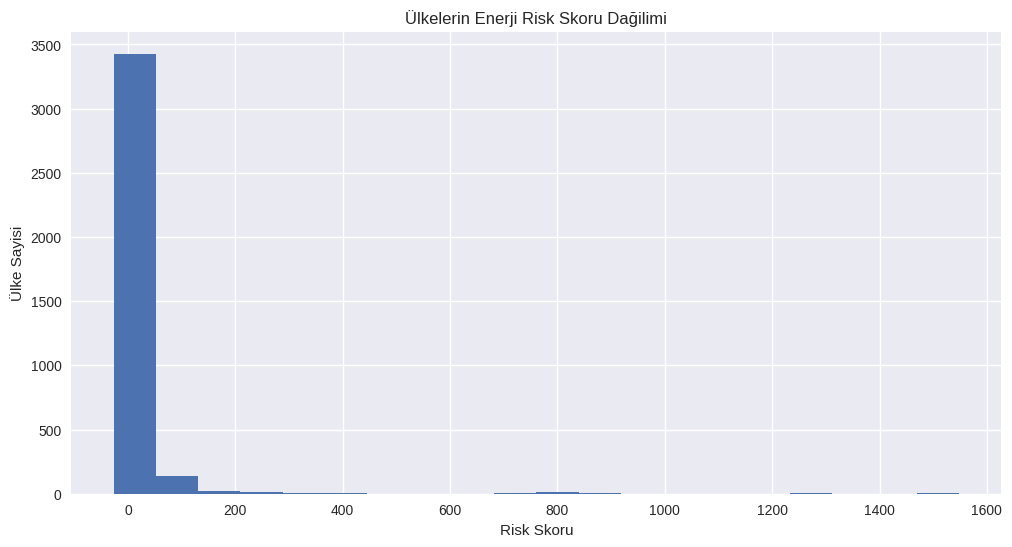

In [121]:
# Risk skorunu görselleştirme
plt.figure(figsize=(12,6))
plt.hist(df["Risk_Score"], bins=20)
plt.xlabel("Risk Skoru")
plt.ylabel("Ülke Sayisi")
plt.title("Ülkelerin Enerji Risk Skoru Dağilimi")
plt.show()

In [122]:
#  Basit risk skoru tanımlama
def risk_level(score):
    if score < 50:
        return "Düşük"
    elif score < 100:
        return "Orta"
    else:
        return "Yüksek"
df["Risk_Level"]=df["Risk_Score"].apply(risk_level)
counts=df["Risk_Level"].value_counts()
print(counts)


Risk_Level
Düşük     3420
Orta       122
Yüksek     107
Name: count, dtype: int64


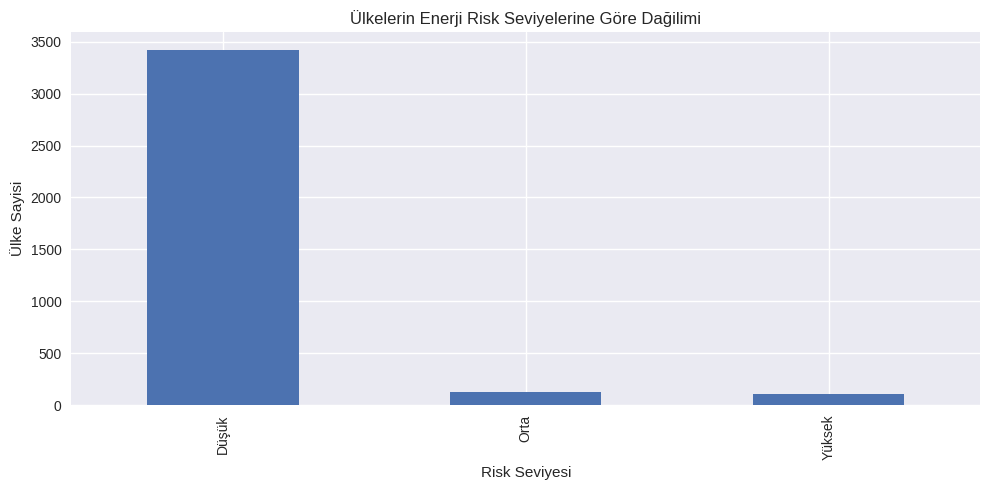

In [123]:
# Risk level dağılımını grafiğe dökme
plt.figure(figsize=(10,5))
counts.plot(kind="bar")
plt.xlabel("Risk Seviyesi")
plt.ylabel("Ülke Sayisi")
plt.title("Ülkelerin Enerji Risk Seviyelerine Göre Dağilimi")

plt.tight_layout()

plt.show()

#Machine Learning

In [124]:
#– SÜTUN İSİMLERİ VE SEÇİM
# Uzun ve karmaşık sütun isimlerini daha okunur hale getiriyoruz
rename_map = {
    'Entity': 'country',
    'Year': 'year',
    'Access to electricity (% of population)': 'access_to_electricity',
    'Access to clean fuels for cooking': 'clean_fuels',
    'Renewable energy share in the total final energy consumption (%)': 'renewable_share',
    'Value_co2_emissions_kt_by_country': 'co2_kt',
    'Primary energy consumption per capita (kWh/person)': 'energy_per_capita',
    'Energy intensity level of primary energy (MJ/$2017 PPP GDP)': 'energy_intensity'
}

# Sütunları yeniden adlandır
df = df.rename(columns=rename_map)

# Analizde kullanılacak sütunları seç

use_cols = ['country','year','access_to_electricity','clean_fuels','renewable_share',
            'co2_kt','energy_per_capita','energy_intensity']

df = df[use_cols]

df.head()


,country,year,access_to_electricity,clean_fuels,renewable_share,co2_kt,energy_per_capita,energy_intensity
0,Afghanistan,2000,1.613591,6.2,44.99,760.000000,302.59482,1.64
1,Afghanistan,2001,4.074574,7.2,45.60,730.000000,236.89185,1.74
2,Afghanistan,2002,9.409158,8.2,37.83,1029.999971,210.86215,1.40
3,Afghanistan,2003,14.738506,9.5,36.66,1220.000029,229.96822,1.40
4,Afghanistan,2004,20.064968,10.9,44.24,1029.999971,204.23125,1.20


In [125]:
#  – EKSİK VERİ TEMİZLEME
# Elektrik erişimi olmayan (çok kritik) satırları çıkar
df = df.dropna(subset=['access_to_electricity'])


# Diğer sayısal sütunlardaki eksik değerleri medyan ile doldur
for col in ['clean_fuels','co2_kt','energy_intensity','renewable_share','energy_per_capita']:
    df[col] = df[col].fillna(df[col].median())

# Eksik veri kaldı mı kontrol et
df.isna().sum()


,0
country,0
year,0
access_to_electricity,0
clean_fuels,0
renewable_share,0
co2_kt,0
energy_per_capita,0
energy_intensity,0


In [126]:
# – RİSK SKORU OLUŞTURMA

# Elektrik ve temiz yakıt erişim açığı hesaplanıyor
df['elec_gap'] = 100 - df['access_to_electricity']
df['clean_gap'] = 100 - df['clean_fuels']

# Enerji yoğunluğunu 0-1 arasına normalize et
scaler = MinMaxScaler()
df['intensity_norm'] = scaler.fit_transform(df[['energy_intensity']])

# Ağırlıklı risk formülü
df['risk_raw'] = (
    0.5 * df['elec_gap'] +
    0.25 * df['clean_gap'] +
    0.25 * df['intensity_norm']
)

# Risk skorunu 0-1 arasına getir
df['risk_score'] = MinMaxScaler().fit_transform(df[['risk_raw']])

# Risk skoruna göre Low / Medium / High etiketleri oluştur
df['risk_label'] = pd.qcut(df['risk_score'], q=3, labels=['Low','Medium','High'])

df[['country','year','risk_score','risk_label']].head()


,country,year,risk_score,risk_label
0,Afghanistan,2000,0.977025,High
1,Afghanistan,2001,0.957124,High
2,Afghanistan,2002,0.917854,High
3,Afghanistan,2003,0.877645,High
4,Afghanistan,2004,0.837099,High


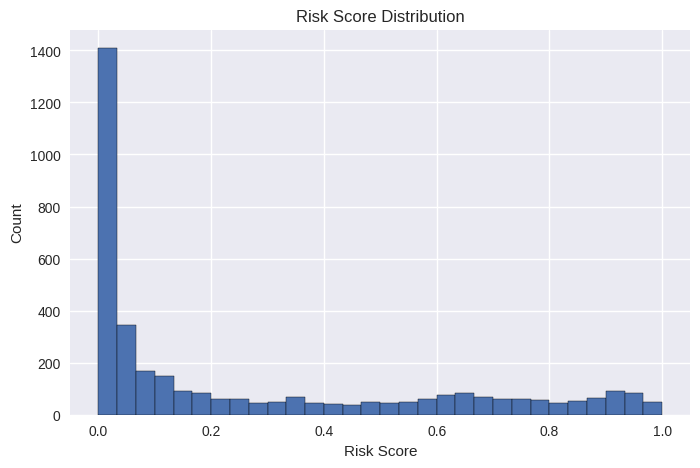

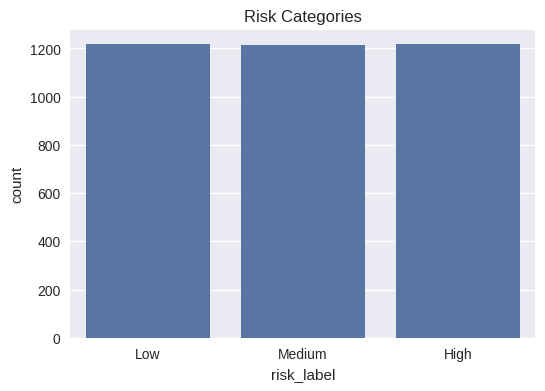

In [127]:
# – DAĞILIM GRAFİKLERİ

# Risk skorunun dağılımı
plt.figure(figsize=(8,5))
plt.hist(df["risk_score"], bins=30, edgecolor="black")
plt.title("Risk Score Distribution")
plt.xlabel("Risk Score")
plt.ylabel("Count")
plt.show()

# Risk sınıflarının sayısı
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="risk_label")
plt.title("Risk Categories")
plt.show()


In [128]:
#  – FEATURE / TARGET HAZIRLIK

# Modele girecek değişkenler
features = ['elec_gap','clean_gap','intensity_norm','renewable_share','energy_per_capita']
X = df[features]
y = df['risk_label']

# Güvenlik için eksik değerleri tekrar doldur
X = X.fillna(X.median())

# Özellikleri standartlaştır (ortalama 0, std 1)
sc = StandardScaler()
X = sc.fit_transform(X)


# Kategorik hedef değişkeni sayısala çevir
le = LabelEncoder()
y = le.fit_transform(y)

# Eğitim ve test seti ayır
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)


In [129]:
# – MODELLER VE PERFORMANS

# Denenecek modeller
models = {
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True),
    "DecisionTree": DecisionTreeClassifier(),
    "RandomForest": RandomForestClassifier(),
    "GradientBoosting": GradientBoostingClassifier(),
    "XGBoost": xgb.XGBClassifier(eval_metric='mlogloss')
}

results = []

# Modelleri eğit ve test et
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    acc = accuracy_score(y_test, preds)
    f1 = f1_score(y_test, preds, average='macro')

    results.append([name, acc, f1])

# Sonuçları tablo halinde göster
df_results = pd.DataFrame(results, columns=["Model", "Accuracy", "F1"])
df_results


,Model,Accuracy,F1
0,KNN,0.950712,0.950589
1,SVM,0.951807,0.951527
2,DecisionTree,0.985761,0.985790
3,RandomForest,0.986857,0.986864
4,GradientBoosting,0.991238,0.991242
5,XGBoost,0.990142,0.990146


In [130]:
#  – MODEL TUNING (GRID SEARCH)
tuned_models = {}

# KNN hiperparametre araması

param_knn = {"n_neighbors":[3,5,7],"weights":["uniform","distance"]}
gs_knn = GridSearchCV(KNeighborsClassifier(), param_knn, cv=5, scoring="f1_macro")
gs_knn.fit(X_train, y_train)
tuned_models["KNN"] = gs_knn.best_estimator_


# SVM hiperparametre araması
param_svm = {"C":[0.1,1,10],"kernel":["linear","rbf"],"gamma":["scale","auto"]}
gs_svm = GridSearchCV(SVC(probability=True), param_svm, cv=5, scoring="f1_macro")
gs_svm.fit(X_train, y_train)
tuned_models["SVM"] = gs_svm.best_estimator_

# Random Forest hiperparametre araması
param_rf = {"n_estimators":[100,200],"max_depth":[5,10],"min_samples_split":[2,5]}
gs_rf = GridSearchCV(RandomForestClassifier(), param_rf, cv=5, scoring="f1_macro")
gs_rf.fit(X_train, y_train)
tuned_models["RandomForest"] = gs_rf.best_estimator_


In [131]:
# – TUNED MODEL SONUÇLARI

tuned_results = []

for name, model in tuned_models.items():
    preds = model.predict(X_test)

    acc = accuracy_score(y_test, preds)
    f1 = f1_score(y_test, preds, average='macro')

    tuned_results.append([name, acc, f1])

pd.DataFrame(tuned_results, columns=["Model", "Accuracy", "F1"])


,Model,Accuracy,F1
0,KNN,0.964951,0.964903
1,SVM,0.980285,0.980240
2,RandomForest,0.984666,0.984667


“Bu bölümde GridSearch sonrası elde edilen tuned modellerin test seti üzerindeki accuracy ve F1-macro skorları hesaplanarak karşılaştırılmıştır.”



In [132]:
# --- FEATURE IMPORTANCE (TUNED RANDOM FOREST) ---

# Tuned Random Forest modelini al
rf_model = tuned_models["RandomForest"]

# Feature importance değerleri

# Modelin hangi feature’a ne kadar önem verdiği
importances = rf_model.feature_importances_

# Feature isimleri ile dataframe
fi_df = pd.DataFrame({
    "Feature": features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

fi_df


,Feature,Importance
1,clean_gap,0.459786
0,elec_gap,0.308861
4,energy_per_capita,0.180851
3,renewable_share,0.039755
2,intensity_norm,0.010747


“Bu bölümde GridSearch ile optimize edilmiş Random Forest modelinin, sınıflandırma kararlarını verirken hangi değişkenlere ne ölçüde önem verdiği feature_importances_ kullanılarak hesaplanmış ve yorumlanmıştır.

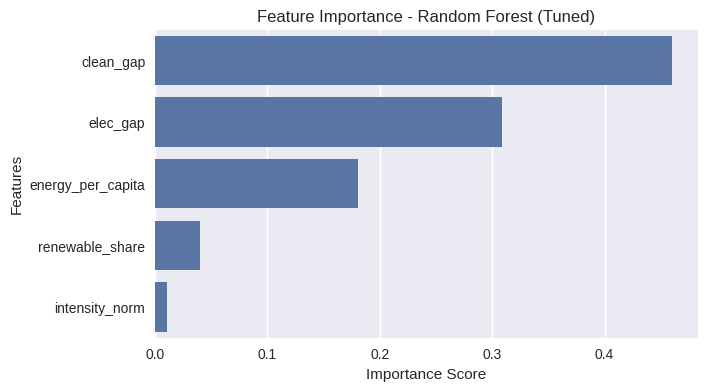

In [133]:
# Feature importance değerlerini yatay bar grafiği olarak çiz
plt.figure(figsize=(7,4))
sns.barplot(data=fi_df, x="Importance", y="Feature")
plt.title("Feature Importance - Random Forest (Tuned)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


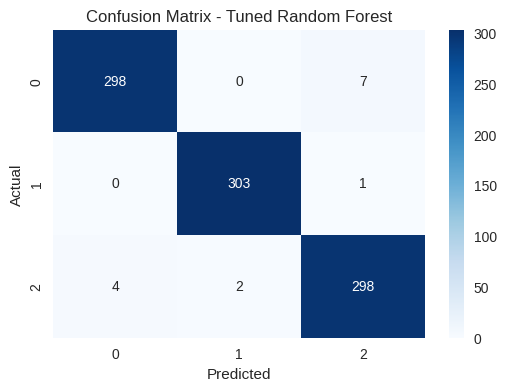

In [134]:

#  – TUNED RANDOM FOREST CONFUSION MATRIX

from sklearn.metrics import confusion_matrix

# # GridSearch sonrası elde edilen en iyi Random Forest modelini alıyoruz
rf_model = tuned_models["RandomForest"]
y_pred = rf_model.predict(X_test)

# Gerçek etiketler (y_test) ile
# modelin tahminlerini (y_pred) karşılaştırarak confusion matrix oluşturuyoruz
cm = confusion_matrix(y_test, y_pred)

# Isı haritası (heatmap) ile confusion matrix çiziliyor
plt.figure(figsize=(6,4))

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Tuned Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


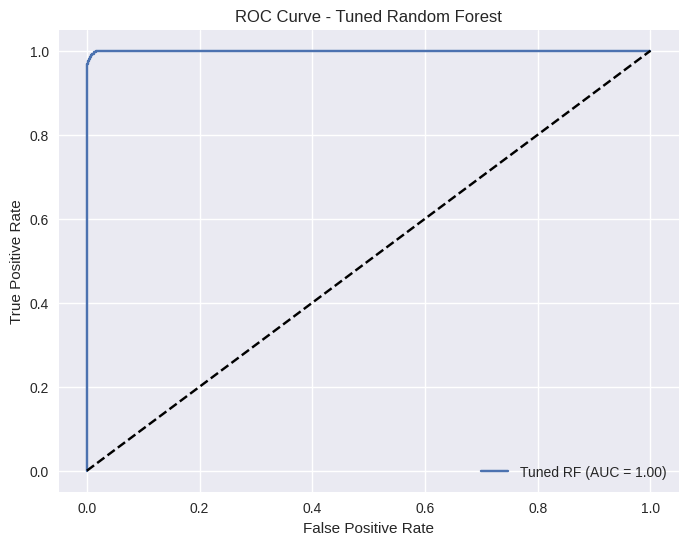

In [135]:

#  TUNED RANDOM FOREST ROC CURVE

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Sınıfları one-hot encode et
classes = le.classes_
y_test_bin = label_binarize(y_test, classes=range(len(classes)))

# Olasılık tahminleri
y_score = rf_model.predict_proba(X_test)

# ROC hesaplama
plt.figure(figsize=(8,6))

fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc = auc(fpr, tpr)

# ROC eğrisini çiz
plt.plot(fpr, tpr, label=f"Tuned RF (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Tuned Random Forest")
plt.legend()
plt.show()


In [136]:
#– GLOBAL RİSK HARİTASI

# Ülkelerin risk skorunu yıllara göre dünya haritasında göster
fig = px.choropleth(
    df,
    locations="country",
    locationmode="country names",
    color="risk_score",
    hover_name="country",
    animation_frame="year",
    color_continuous_scale="RdYlGn_r",
    title="Global Energy Risk Map"
)
fig.update_layout(height=600)
fig.show()




“Bu projede ülkelerin enerji erişimi ve sürdürülebilirlik verilerini kullanarak risk skoru oluşturduk, ardından bu riski makine öğrenmesi modelleriyle sınıflandırdık ve model tuning ile performansı artırdık. Son olarak sonucu global harita üzerinde görselleştirdik.”